In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Dataset

In [ ]:
url='https://raw.githubusercontent.com/Sandeep-git1/E-D-A/refs/heads/main/Bank_Locations.csv'
data=pd.read_csv(url)

# Standardize column names

In [ ]:

data.columns = data.columns.str.strip().str.replace(" ", "_").str.lower()

In [ ]:
data.shape

(195, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   x                 195 non-null    float64
 1   y                 195 non-null    float64
 2   name              195 non-null    object 
 3   address           195 non-null    object 
 4   zipcode           195 non-null    int64  
 5   ward              195 non-null    object 
 6   latitude          195 non-null    float64
 7   longitude         195 non-null    float64
 8   objectid          195 non-null    int64  
 9   xcoord            195 non-null    float64
 10  ycoord            195 non-null    float64
 11  mar_id            195 non-null    int64  
 12  gis_id            195 non-null    object 
 13  se_anno_cad_data  0 non-null      float64
 14  globalid          195 non-null    object 
 15  creator           40 non-null     object 
 16  created           40 non-null     object 
 1

In [ ]:
data.columns

Index(['x', 'y', 'name', 'address', 'zipcode', 'ward', 'latitude', 'longitude',
       'objectid', 'xcoord', 'ycoord', 'mar_id', 'gis_id', 'se_anno_cad_data',
       'globalid', 'creator', 'created', 'editor', 'edited'],
      dtype='object')

In [ ]:
data.dtypes

,0
x,float64
y,float64
name,object
address,object
zipcode,int64
ward,object
latitude,float64
longitude,float64
objectid,int64
xcoord,float64


In [ ]:
data.isnull().sum()

,0
x,0
y,0
name,0
address,0
zipcode,0
ward,0
latitude,0
longitude,0
objectid,0
xcoord,0


# Handle missing values

In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

data[categorical_columns] = data[categorical_columns].fillna('Unknown')
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())


# Remove duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()


0

# Exploratory Data Analysis (EDA)

# 1. Summary statistics for numerical columns

In [ ]:
data.describe()

,x,y,zipcode,latitude,longitude,objectid,xcoord,ycoord,mar_id,se_anno_cad_data
count,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,0.0
mean,-8.575050e+06,4.708755e+06,20011.379487,38.909758,-77.030984,193.651282,397313.323385,137989.526769,255404.912821,NaN
std,3.454988e+03,3.441380e+03,10.466913,0.024053,0.031037,198.003414,2691.316737,2670.667235,66759.675500,NaN
min,-8.583195e+06,4.699661e+06,20001.000000,38.846162,-77.104150,1.000000,390969.050000,130929.030000,5831.000000,NaN
25%,-8.576517e+06,4.707281e+06,20005.000000,38.899456,-77.044161,60.500000,396169.625000,136845.375000,240931.000000,NaN
50%,-8.575209e+06,4.707861e+06,20007.000000,38.903508,-77.032409,133.000000,397188.820000,137295.430000,273858.000000,NaN
75%,-8.573173e+06,4.710204e+06,20016.000000,38.919886,-77.014122,199.500000,398775.025000,139113.010000,300777.500000,NaN
max,-8.566002e+06,4.719052e+06,20059.000000,38.981704,-76.949707,667.000000,404363.020000,145975.500000,338263.000000,NaN


In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
data[categorical_columns].describe()

,name,address,ward,gis_id,globalid,creator,created,editor,edited
count,195,195,195,195,195,195,195,195,195
unique,35,190,8,194,195,2,41,2,159
top,Wells Fargo Bank,1350 I STREET NW,Ward 2,BankPt_67,{556B5591-577D-4E76-8735-4380271BEFCF},Unknown,Unknown,GHATCHARD,Unknown
freq,29,2,92,2,1,155,155,160,35


In [ ]:
data[numerical_columns].describe()

,x,y,zipcode,latitude,longitude,objectid,xcoord,ycoord,mar_id,se_anno_cad_data
count,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,0.0
mean,-8.575050e+06,4.708755e+06,20011.379487,38.909758,-77.030984,193.651282,397313.323385,137989.526769,255404.912821,NaN
std,3.454988e+03,3.441380e+03,10.466913,0.024053,0.031037,198.003414,2691.316737,2670.667235,66759.675500,NaN
min,-8.583195e+06,4.699661e+06,20001.000000,38.846162,-77.104150,1.000000,390969.050000,130929.030000,5831.000000,NaN
25%,-8.576517e+06,4.707281e+06,20005.000000,38.899456,-77.044161,60.500000,396169.625000,136845.375000,240931.000000,NaN
50%,-8.575209e+06,4.707861e+06,20007.000000,38.903508,-77.032409,133.000000,397188.820000,137295.430000,273858.000000,NaN
75%,-8.573173e+06,4.710204e+06,20016.000000,38.919886,-77.014122,199.500000,398775.025000,139113.010000,300777.500000,NaN
max,-8.566002e+06,4.719052e+06,20059.000000,38.981704,-76.949707,667.000000,404363.020000,145975.500000,338263.000000,NaN


In [ ]:
#Little MCAR Test
import numpy as np
from scipy.stats import chi2

def little_mcar_test(data):
    n = len(data)  # number of rows in dataset = n
    groups = []

    # Identify columns with missing data and create binary masks
    for col in data.columns:
        mask = data[col].isnull()
        if mask.any():
            groups.append(mask.astype(int).values.reshape(-1, 1))

    if len(groups) == 0:
        raise ValueError("No missing data found")

    # Concatenate all binary masks
    r = np.concatenate(groups, axis=1)

    # Calculate the group statistics
    group_stats = r.T @ r  # performs matrix multiplication, between transpose and the matrix itself
    m = len(groups)
    df = (n - 1) * m
    chi2_stat = group_stats.trace()

    # Calculate the p-value
    p_value = chi2.sf(chi2_stat, df)

    return {"chi2_stat": chi2_stat, "degree_of_freedom": df, "p_value": p_value}

# Assuming 'data' is your DataFrame
result = little_mcar_test(data)
print(f"Chi-square statistic: {result['chi2_stat']}")
print(f"Degrees of freedom: {result['degree_of_freedom']}")
print(f"P-Value: {result['p_value']}")


Chi-square statistic: 195
Degrees of freedom: 194
P-Value: 0.4663218694499355


In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['x', 'y', 'zipcode', 'latitude', 'longitude', 'objectid', 'xcoord',
       'ycoord', 'mar_id', 'se_anno_cad_data'],
      dtype='object')

# 3. Count of categories

In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['name', 'address', 'ward', 'gis_id', 'globalid', 'creator', 'created',
       'editor', 'edited'],
      dtype='object')

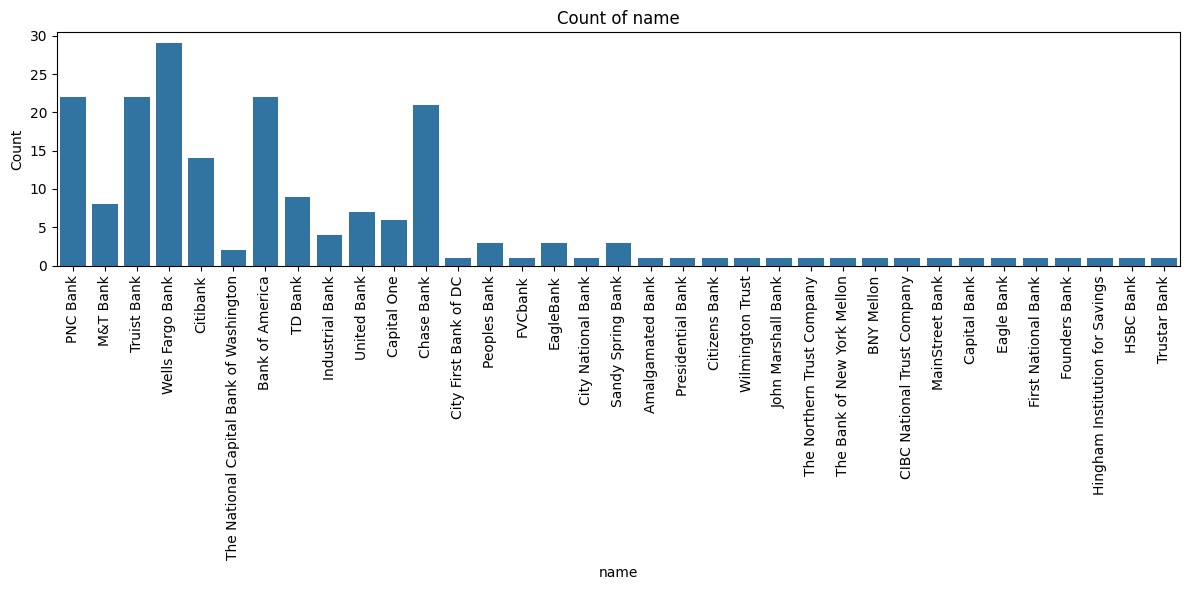

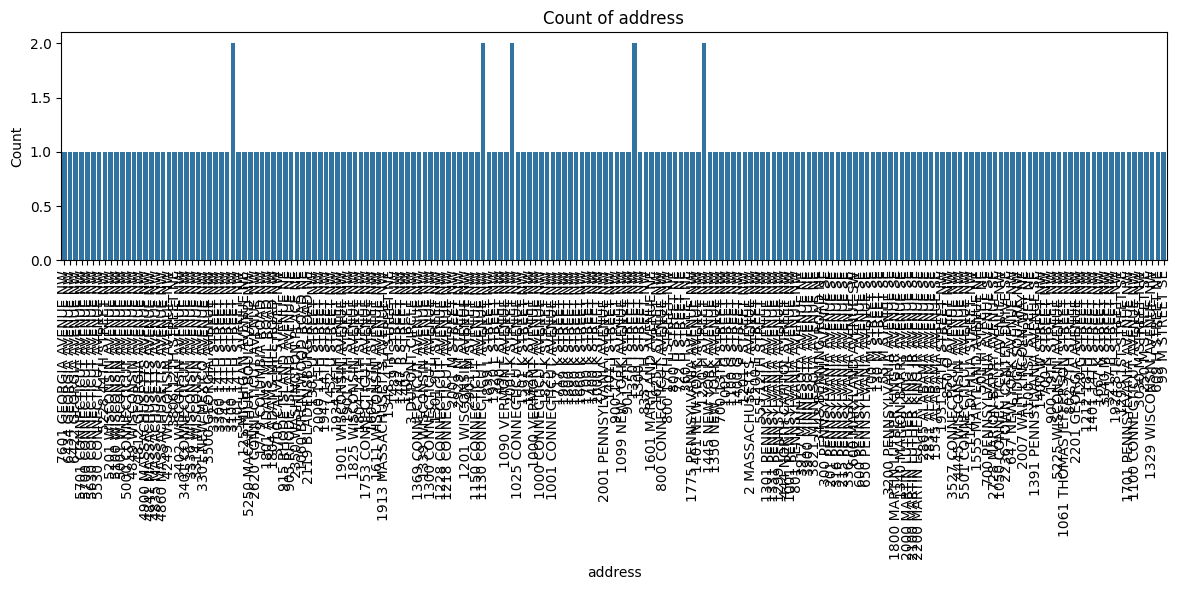

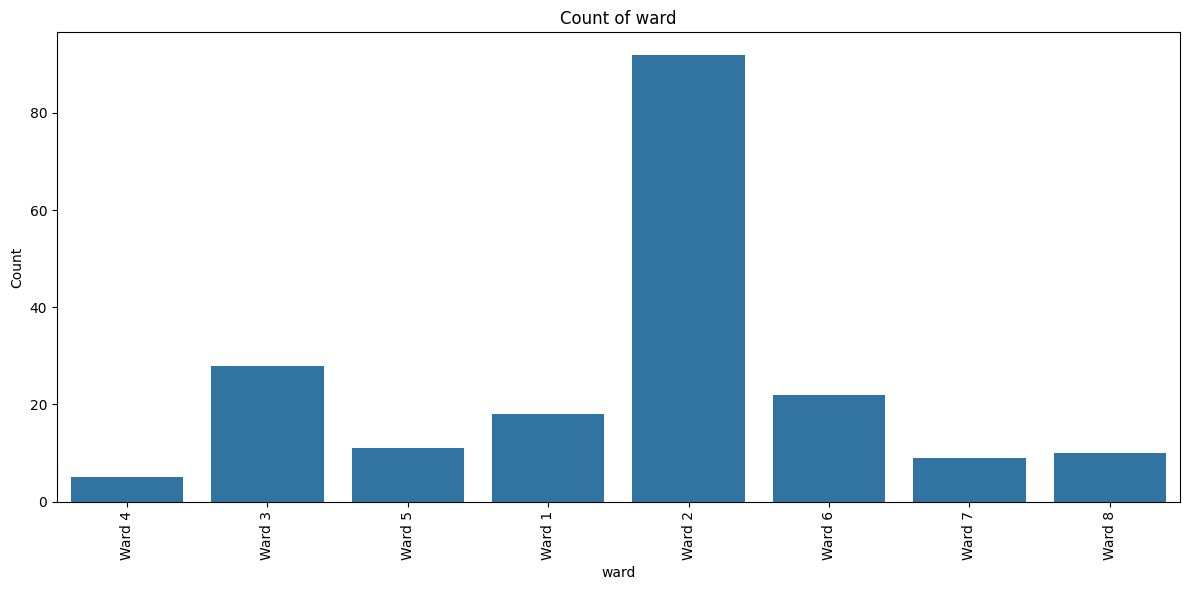

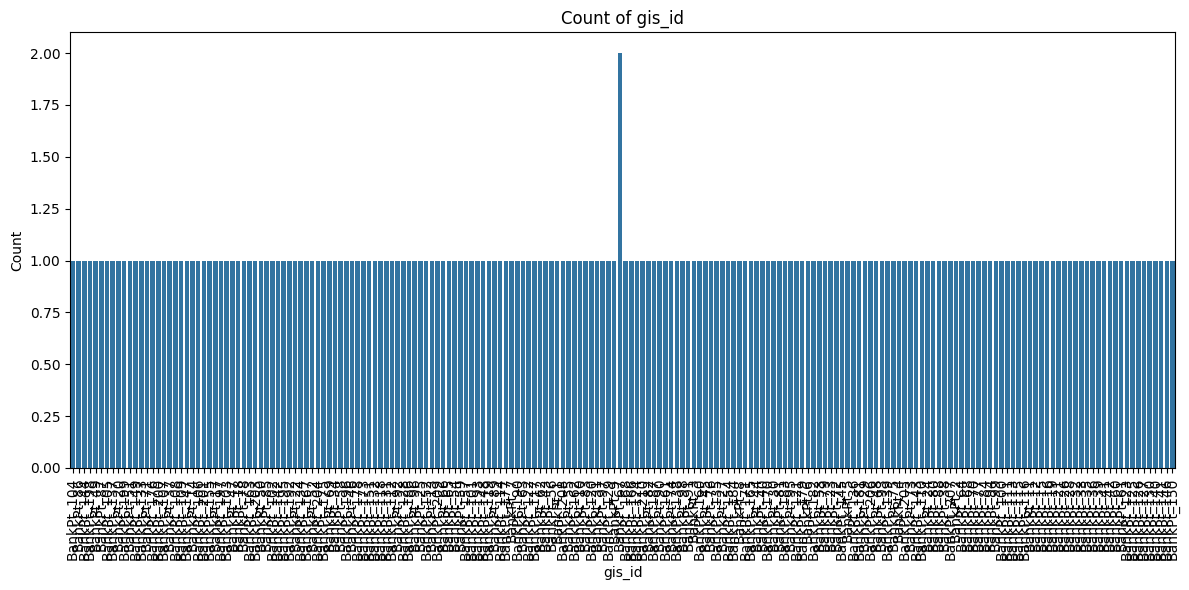

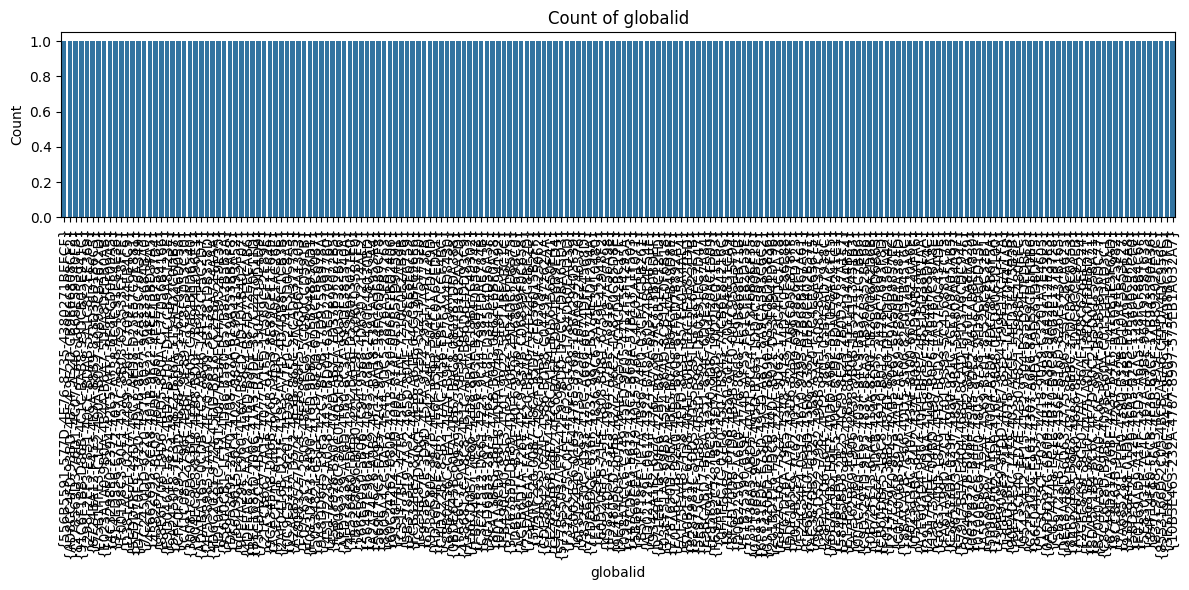

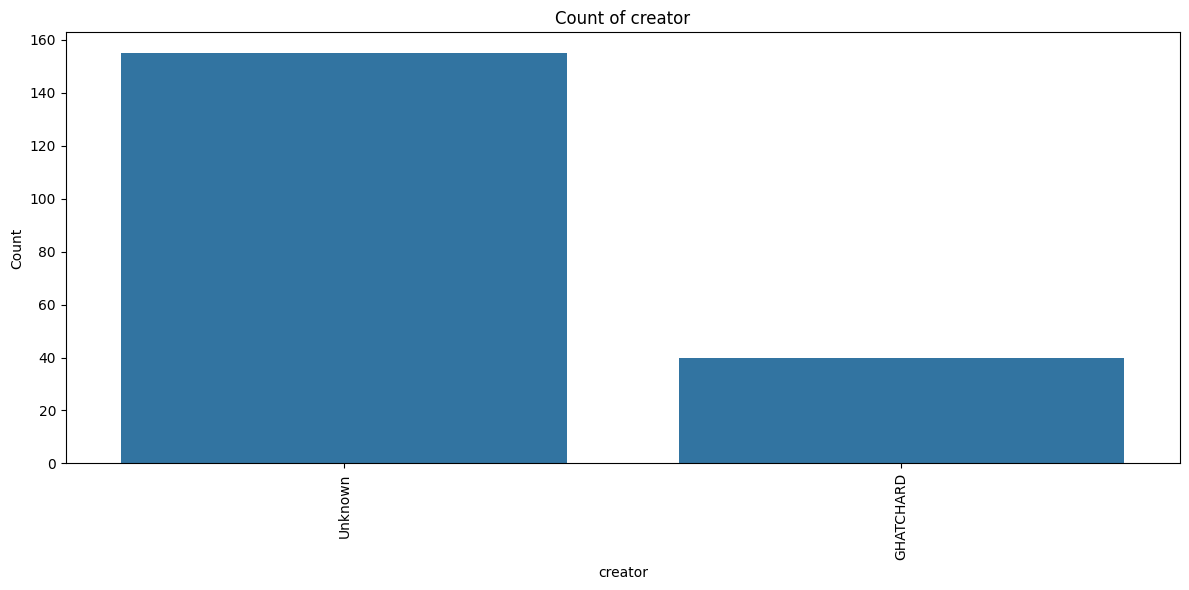

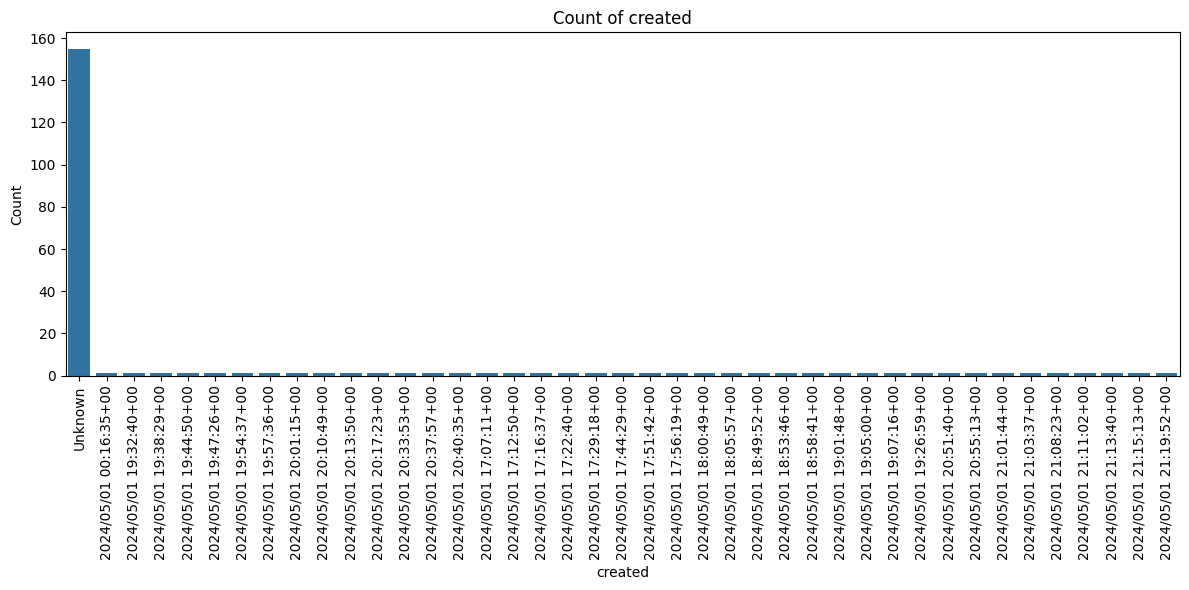

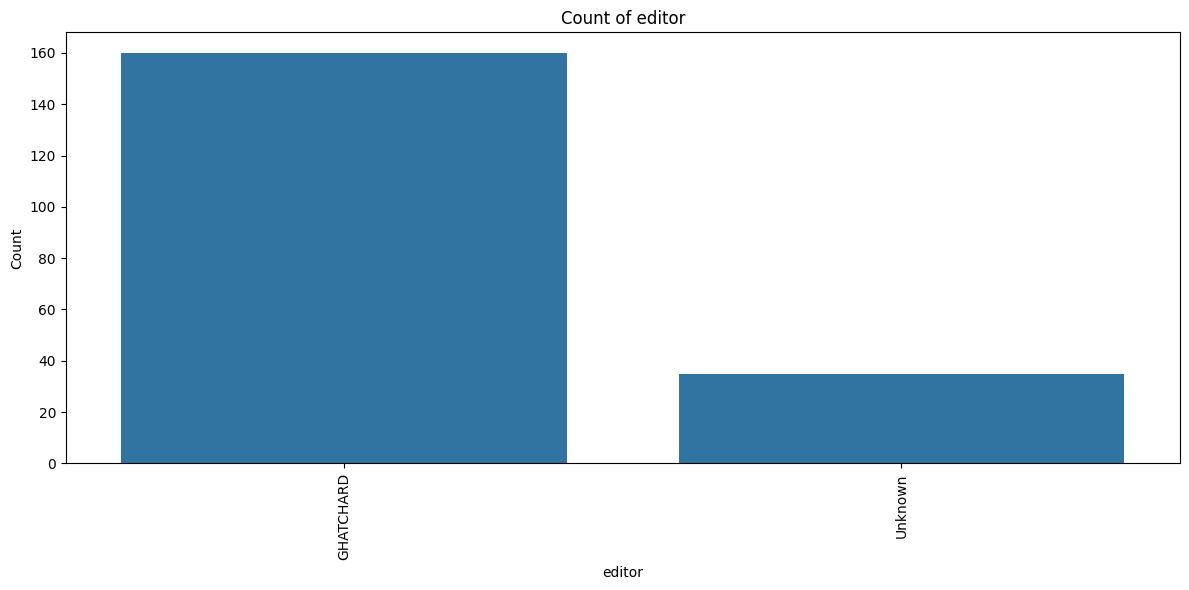

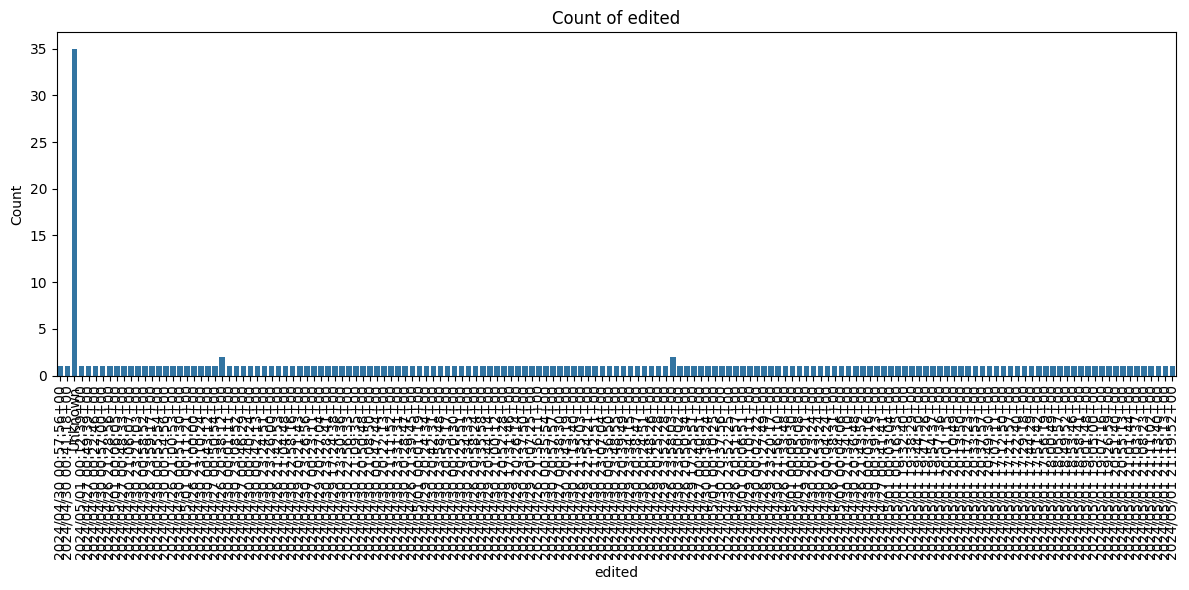

In [ ]:
for i in categorical_columns:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=data, x=i)
  plt.title(f'Count of {i}')
  plt.xlabel(i)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

# 4. Correlation heatmap for numerical features

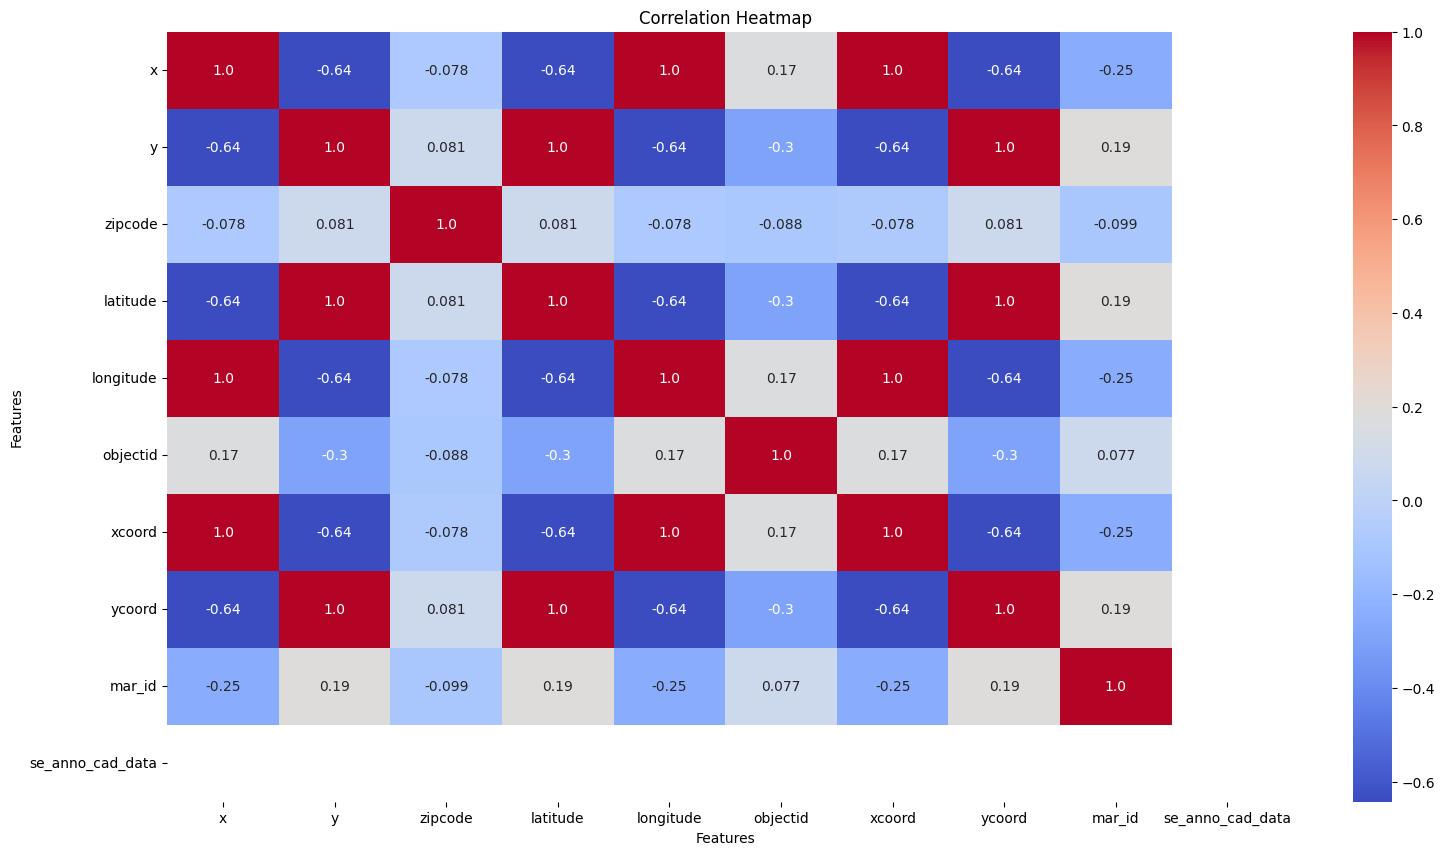

In [ ]:
plt.figure(figsize=(18, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt="0.2", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# 5. Multivariant analysis for numerical features

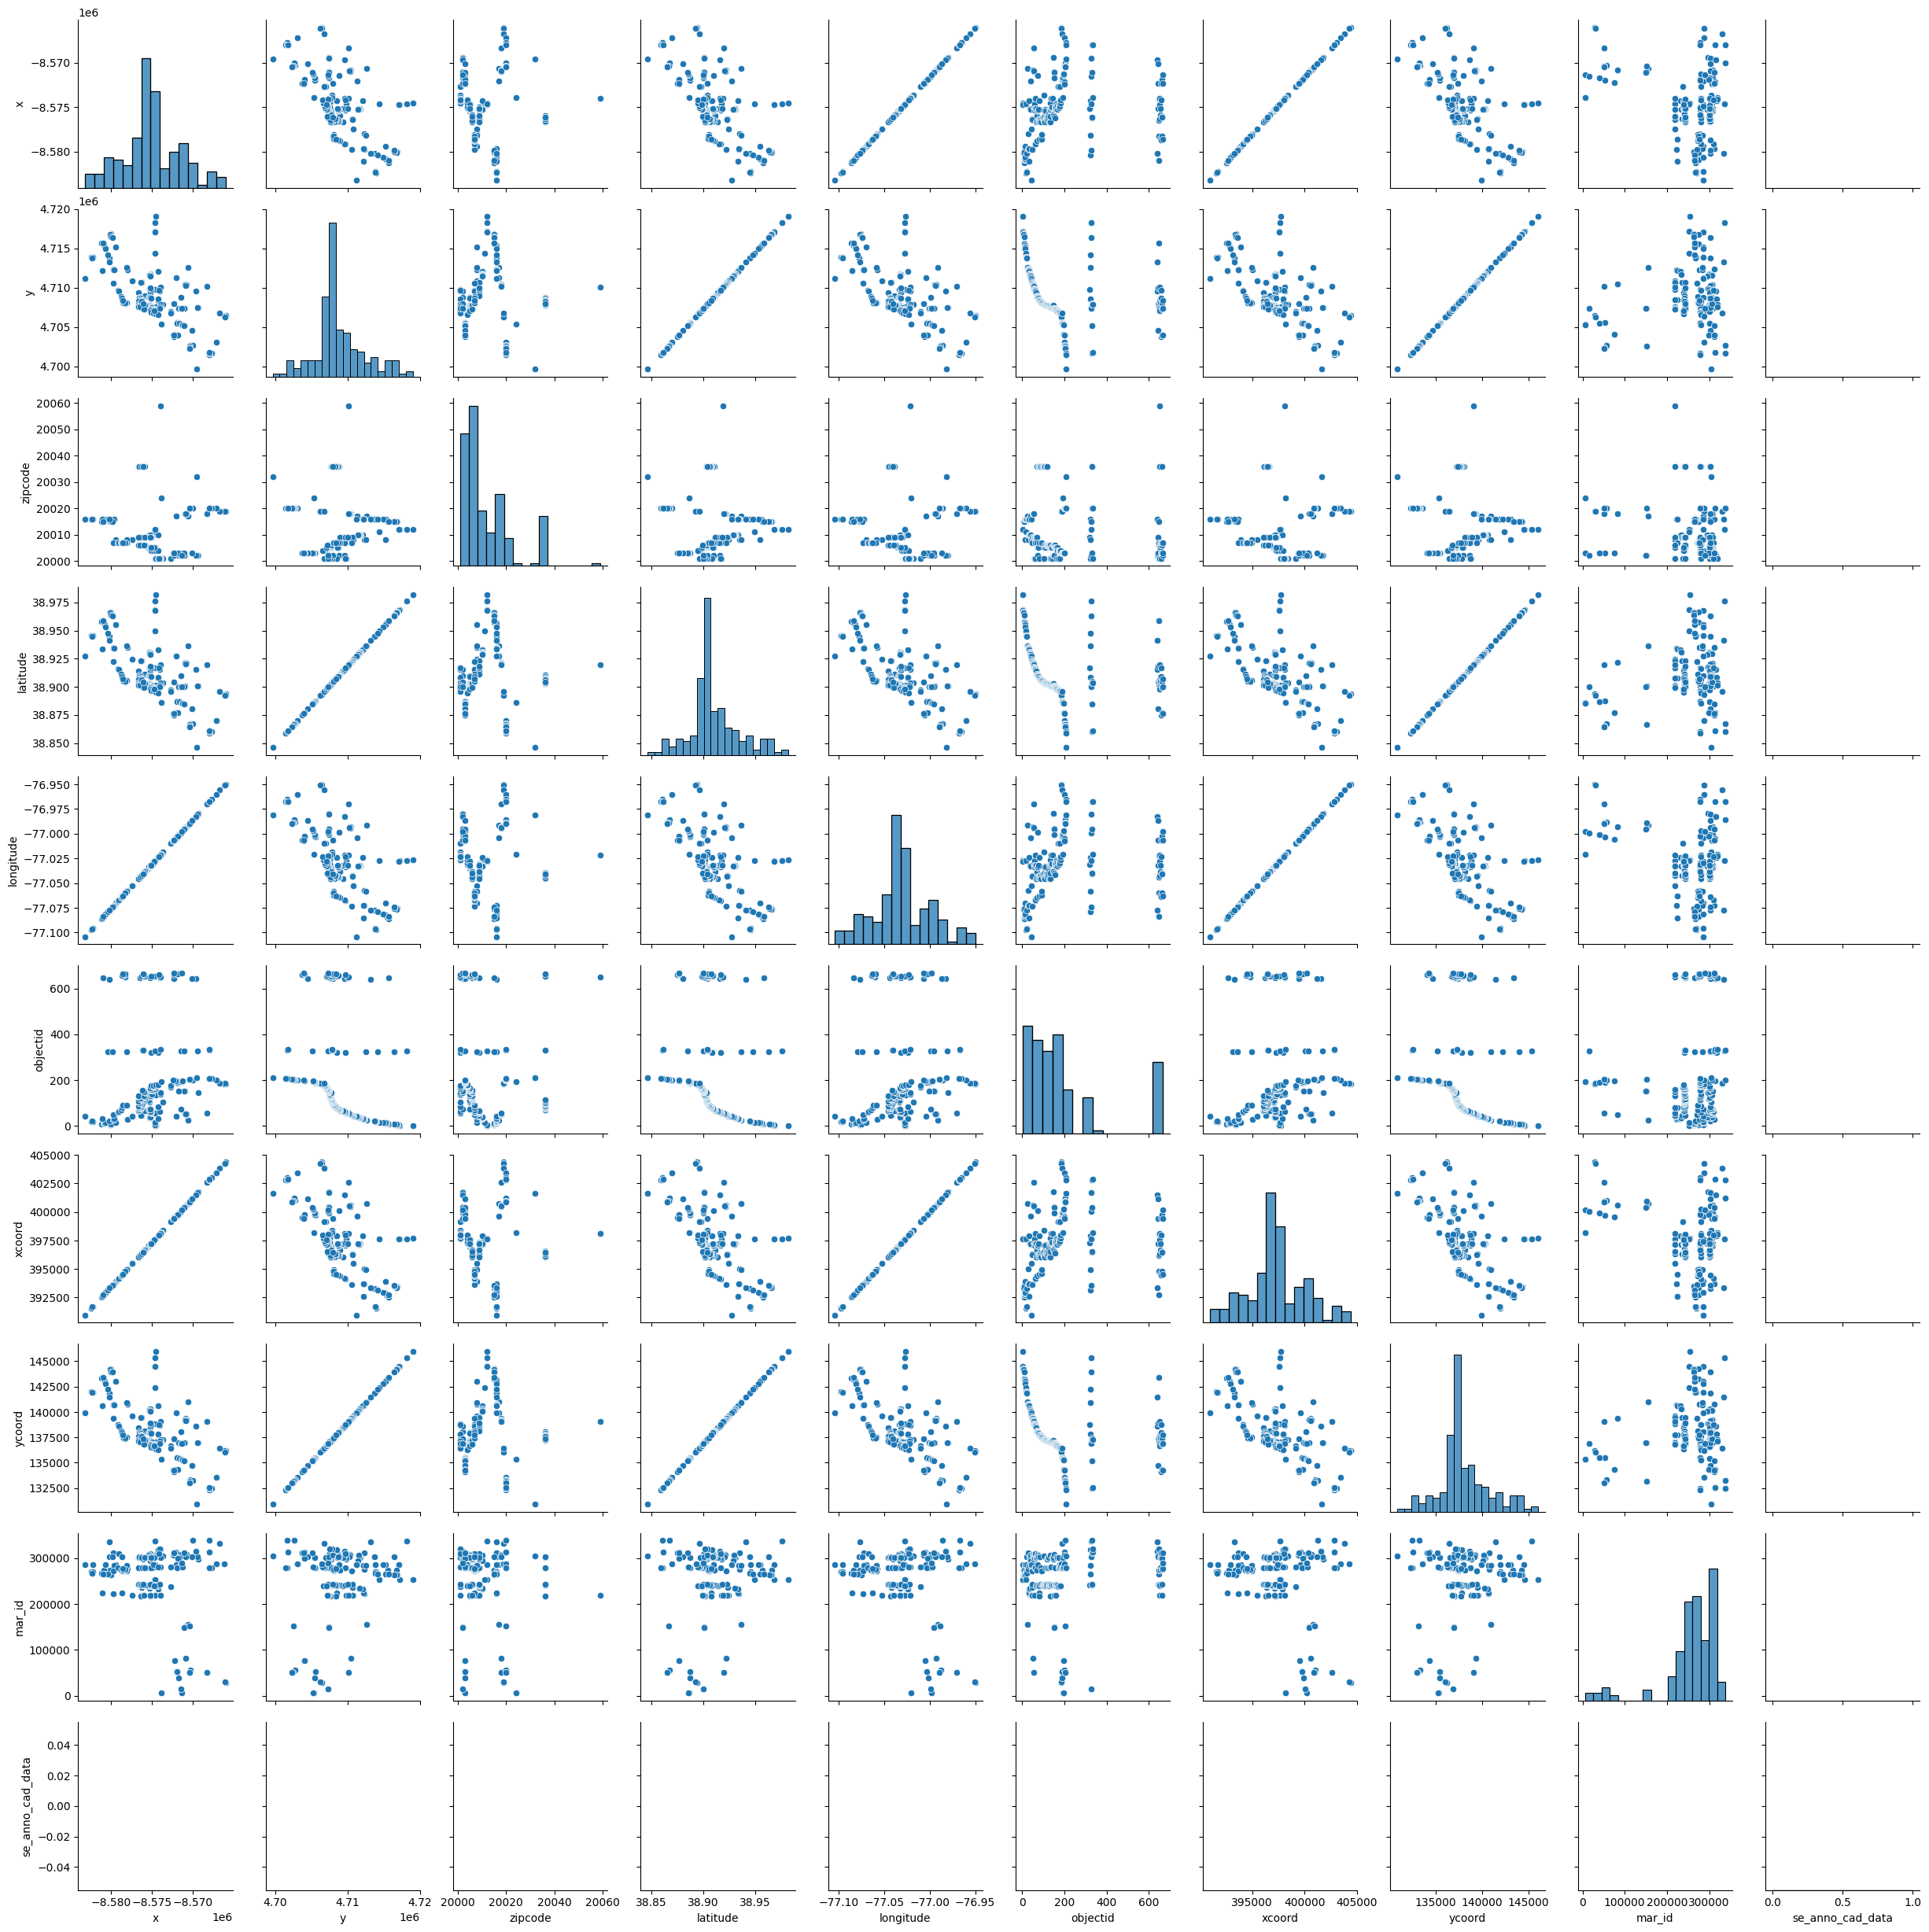

In [ ]:
sns.pairplot(data[numerical_columns])
plt.show()

# 6. Prepare features and target

In [ ]:
target = 'zipcode'

In [ ]:
features = data.drop(columns=['zipcode', target])
features_encoded = pd.get_dummies(features, drop_first=True)
y = data[target].astype(int)

# 7. Split the data



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 826), (39, 826), (156,), (39,))

# 8. Train Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 9. Predictions

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([20003, 20016, 20009, 20005, 20036, 20020, 20007, 20016, 20005,
       20006, 20007, 20016, 20005, 20015, 20020, 20005, 20007, 20005,
       20007, 20001, 20004, 20003, 20036, 20009, 20016, 20005, 20036,
       20005, 20010, 20005, 20005, 20036, 20016, 20003, 20004, 20016,
       20018, 20001, 20036])

# 10. Evaluate the model


In [ ]:
y_test = y_test.values

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
accuracy

0.8717948717948718

In [ ]:
print(classification_report_text)

              precision    recall  f1-score   support

       20001       0.50      0.33      0.40         3
       20003       1.00      1.00      1.00         3
       20004       1.00      1.00      1.00         2
       20005       0.89      0.89      0.89         9
       20006       1.00      1.00      1.00         1
       20007       1.00      1.00      1.00         4
       20009       0.50      1.00      0.67         1
       20010       1.00      1.00      1.00         1
       20015       0.00      0.00      0.00         0
       20016       1.00      0.86      0.92         7
       20017       0.00      0.00      0.00         1
       20018       0.00      0.00      0.00         0
       20020       1.00      1.00      1.00         2
       20036       1.00      1.00      1.00         5

    accuracy                           0.87        39
   macro avg       0.71      0.72      0.71        39
weighted avg       0.90      0.87      0.88        39



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

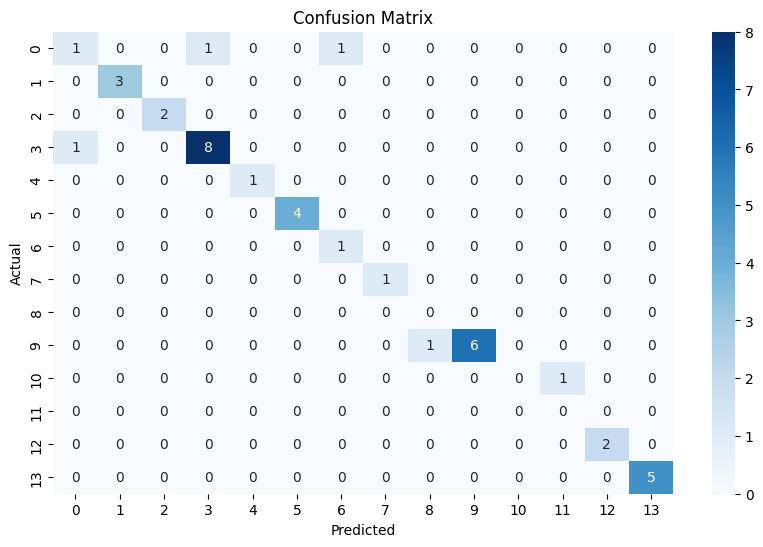

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()